In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

filepath = "/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/"
train_df = pd.read_csv(filepath + 'radshift_links_cross_posting_info.csv')

In [7]:
predictor_vars = ['consumptions_by_type__link_clicks', 'stories_by_action_type__share']
response_vars = ['twoday_consumptions_by_type__link_clicks', 'twoday_stories_by_action_type__share']

In [14]:
# y = train_df[predictor_vars]
y = train_df[response_vars]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e83f5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e981198>]], dtype=object)

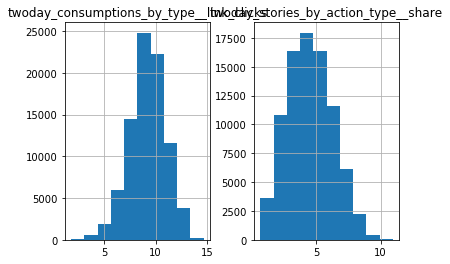

In [15]:
import numpy as np
np.log(y+1).hist()

In [21]:
print("Task 3 viz!")

Task 3 viz!


In [69]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

filepath = '/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/'
train_df = pd.read_csv(filepath + 'radshift-links-previous-to-next-page-info.csv')

one_hour_features = [
       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
                ]

two_day_features = [
       'twoday_consumptions_by_type__link_clicks',
       'twoday_stories_by_action_type__share',
]

all_pages = train_df['page'].unique()
cross_promotion_features = all_pages

# train_features = one_hour_features
# print("ONLY 1 HOUR PERFORMANCE IN PREVIOUS PAGE")
# print('SHARES:')
# res = ols(y = train_df['next_shares'], x = train_df[train_features])
# print(res)
# print('CLICKS:')
# res = ols(y = train_df['next_clicks'], x = train_df[train_features])
# print(res)
# train_features = one_hour_features + page_infos# + cross_promotion_features
# for feat in cross_promotion_features:
#     train_features.append(feat)
# train_features

# from sklearn import linear_model
# clf = linear_model.LinearRegression()
# print("LINEAR REGRESSION!")

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth = 10)
print("TREE REGRESSION!")

# train_df = pd.read_csv('radshift-links-previous-to-next-page-info.csv')
# all_pages = list(train_df.page.unique())

print("Performance stats with page names, and also cross-promotion order included!")
# print("WITH cross-promotion features")

page_infos = ['page', 'next_page']

# train_features = one_hour_features
# train_features = one_hour_features + page_infos + cross_promotion_features
train_features = one_hour_features + page_infos
# train_features = cross_promotion_features + one_hour_features

log_scale = 1
# log_scale = 0

if log_scale == 1:
    for feat in one_hour_features:
        train_df[feat] = np.log(train_df[feat] + 1)

# cross_promote = 0
cross_promote = 1

if cross_promote == 1:
    for feat in cross_promotion_features:
        train_features.append(feat)
        
# train_features = two_day_features + one_hour_features + cross_promotion_features

# for feats in (one_hour_features):
#     train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1)
train_df['share_bucket'] = np.log(train_df['next_shares']+1)
# train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1).astype(int)
# train_df['share_bucket'] = np.log(train_df['next_shares']+1).astype(int)

print("No. of data-points = ", len(train_df))

if log_scale == 0:
    print("Raw values!")
    y_clicks = train_df['next_clicks']
    y_share = train_df['next_shares']
else:
    print("Log scaled!")
    y_clicks = train_df['clicks_bucket']
    y_share = train_df['share_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]
####convert page_infos into dummies
X = pd.get_dummies(data = X, columns=['page', 'next_page'])

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

clicks_accuracy = []
clicks_error = []
shares_accuracy = []
shares_error = []

share_cv_y_test = []
share_cv_y_pred = []
clicks_cv_y_test = []
clicks_cv_y_pred = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    ####
    for pt in y_test:
        share_cv_y_test.append(pt)
    for pt in y_pred:
        share_cv_y_pred.append(pt)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    shares_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    shares_error.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    ####
    for pt in y_test:
        clicks_cv_y_test.append(pt)
    for pt in y_pred:
        clicks_cv_y_pred.append(pt)

    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
    fold += 1
print("Shares performance: Accuracy = ", np.mean(shares_accuracy), " ; Error (/100) = ", np.mean(shares_error))
print("Clicks performance: Accuracy = ", np.mean(clicks_accuracy), " ; Error (/100) = ", np.mean(clicks_error))

if log_scale == 1:
    ##share
    print("Converting log-scale values back to exponents!")
    print('Shares!')
    accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
    print("R2: ", accuracy)
    error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
    print("Error (\\100): ", error_percent)
    print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
#     plt.scatter(share_cv_y_test, share_cv_y_pred)

    print('Clicks!')
    accuracy = metrics.r2_score(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)
    print("R2: ", accuracy)
    error_percent = mean_absolute_error(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)/np.mean(np.exp(clicks_cv_y_test)-1)
    print("Error (\\100): ", error_percent)
    print("Mean: ", np.mean(np.exp(clicks_cv_y_test)-1))
#     plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)

TREE REGRESSION!
Performance stats with page names, and also cross-promotion order included!
No. of data-points =  38769
Log scaled!
Shares performance: Accuracy =  0.657504952536  ; Error (/100) =  0.212635259128
Clicks performance: Accuracy =  0.72162568958  ; Error (/100) =  0.0910447974771
Converting log-scale values back to exponents!
Shares!
R2:  0.779841664485
Error (\100):  0.516329793952
Mean:  118.348990173
Clicks!
R2:  0.779658862269
Error (\100):  0.398451498565
Mean:  10139.2730016


R2:  0.744407421459
Error (\100):  0.184608169602
Mean:  3.41856212424
Shares!
R2:  0.842963930461
Error (\100):  0.0681147030698
Mean:  7.82726669264
Clicks!


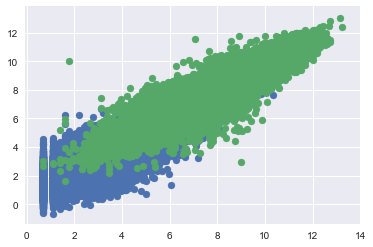

In [33]:
##share
# share_cv_y_test
# share_cv_y_pred

accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(share_cv_y_test))
########
# accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Shares!')
plt.scatter(share_cv_y_test, share_cv_y_pred)

accuracy = metrics.r2_score(clicks_cv_y_test, clicks_cv_y_pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(clicks_cv_y_test, clicks_cv_y_pred)/np.mean(clicks_cv_y_test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(clicks_cv_y_test))
########
# accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Clicks!')
plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


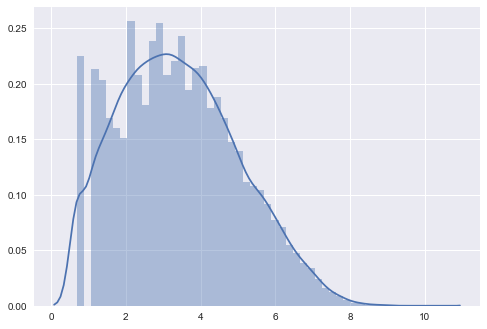

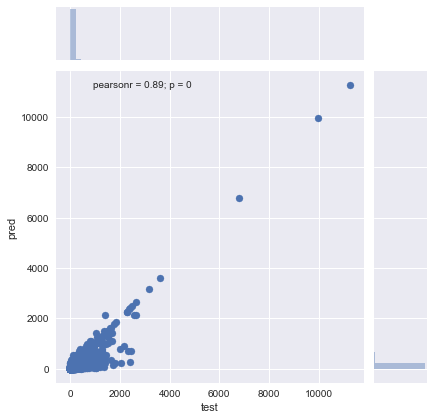

In [70]:
df = pd.DataFrame()
df['test'] = share_cv_y_test
df['pred'] = share_cv_y_pred

if log_scale == 1:
    df['test'] = np.exp(df['test'] - 1)
    df['pred'] = np.exp(df['pred'] - 1)

import seaborn as sns
sns.set(color_codes=True)
sns.distplot(share_cv_y_test)
sns.jointplot(x="test", y="pred", data=df)

In [71]:
test = df['test']
pred = df['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))
np.percentile(df['test'], 10), np.percentile(df['test'], 50), np.percentile(df['test'], 90)

percentile_5 = np.percentile(df['test'], 5)
percentile_10 = np.percentile(df['test'], 10)
percentile_20 = np.percentile(df['test'], 20)
percentile_50 = np.percentile(df['test'], 50)
percentile_90 = np.percentile(df['test'], 90)
percentile_95 = np.percentile(df['test'], 95)
percentile_99 = np.percentile(df['test'], 99)

R2:  0.779841664485
Error (\100):  0.51200357558
Mean:  43.9060398090577


In [73]:
test = df[df['test'] > percentile_10]['test']
pred = df[df['test'] > percentile_10]['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))

R2:  0.778026935618
Error (\100):  0.507611106572
Mean:  47.870136094964295


In [57]:
test = df[df['test'] < percentile_95]['test']
pred = df[df['test'] < percentile_95]['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))

R2:  0.501340554176
Error (\100):  0.52106291654
Mean:  23.77279542472543


In [78]:
low = -1
# low = percentile_5
# high = percentile_95
high = df['test'].max() + 1

# test = df['test']
# pred = df['pred']
test = df[(df['test'] > low) & (df['test'] < high)]['test']
pred = df[(df['test'] > low) & (df['test'] < high)]['pred']

######
accuracy = metrics.r2_score(test, pred)
print("R2: ", accuracy)
error_percent = mean_absolute_error(test, pred)/np.mean(test)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(test))
high

# ## FOR LINEAR REGRESSION: 
# ##ALL TEST DATA
# R2:  0.380172734065
# Error (\100):  0.557827531234
# Mean:  43.90603980905763
# ##Excluding 99th percentile
# R2:  0.564629844199
# Error (\100):  0.5226670034
# Mean:  34.945192183572395

R2:  0.779841664485
Error (\100):  0.51200357558
Mean:  43.9060398090577


11255.167864316754

R2:  0.779841664155
Error (\100):  0.516329923125
Mean:  118.348990173
Shares!
R2:  0.779658862269
Error (\100):  0.398451498565
Mean:  10139.2730016
Clicks!


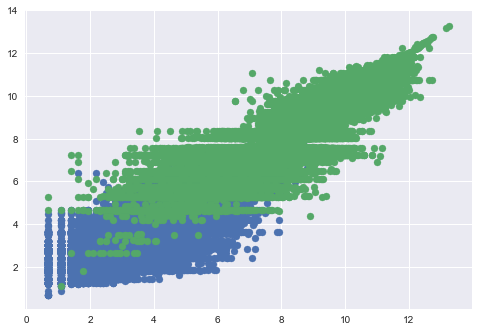

In [29]:
##share
# share_cv_y_test
# share_cv_y_pred

# accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(share_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Shares!')
plt.scatter(share_cv_y_test, share_cv_y_pred)

# accuracy = metrics.r2_score(clicks_cv_y_test, clicks_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(clicks_cv_y_test, clicks_cv_y_pred)/np.mean(clicks_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(clicks_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)/np.mean(np.exp(clicks_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(clicks_cv_y_test)-1))

print('Clicks!')
plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)

R2:  0.779841664155
Error (\100):  0.516329923125
Mean:  118.348990173
Shares!
R2:  0.779658862269
Error (\100):  0.398451498565
Mean:  10139.2730016
Clicks!


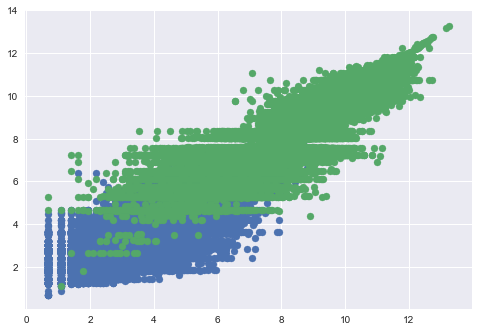

In [30]:
##share
# share_cv_y_test
# share_cv_y_pred

# accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(share_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Shares!')
plt.scatter(share_cv_y_test, share_cv_y_pred)

# accuracy = metrics.r2_score(clicks_cv_y_test, clicks_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(clicks_cv_y_test, clicks_cv_y_pred)/np.mean(clicks_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(clicks_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)/np.mean(np.exp(clicks_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(clicks_cv_y_test)-1))

print('Clicks!')
plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)

In [ ]:
#####prediction tests - task 3

In [105]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

filepath = '/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/'
train_df = pd.read_csv(filepath + 'radshift-links-previous-to-next-page-info.csv')

one_hour_features = [
       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
                ]

two_day_features = [
       'twoday_consumptions_by_type__link_clicks',
       'twoday_stories_by_action_type__share',
]

all_pages = train_df['page'].unique()
cross_promotion_features = all_pages

page_infos = ['page', 'next_page']

# train_features = one_hour_features
# train_features = one_hour_features + page_infos + cross_promotion_features
test_features = one_hour_features + page_infos
# train_features = cross_promotion_features + one_hour_features

# cross_promote = 0
cross_promote = 1

if cross_promote == 1:
    for feat in cross_promotion_features:
        test_features.append(feat)

# log_scale = 1
log_scale = 0

if log_scale == 1:
    for feat in one_hour_features:
        test_df[feat] = np.log(test_df[feat] + 1)
        
#####train on all, test per page! 

pages = []
accuracy = []
topK_hit_rate = []
num_links = []

print("Shares!")
# test_page = 'Tasty'

# for test_page in train_df['next_page'].unique():
for test_page in ['Tasty', 'SOML', 'BuzzFeed News', 'Nifty', 'BuzzFeed Animals']:
# for test_page in ['Tasty']:
#     print("Test page: ", test_page)
    X = train_df
    # X = train_df[~(train_df.next_page == test_page)]
    y_train = X['next_shares']
    X = X[test_features]
    X['test_split'] = 0

    test_df = train_df[train_df.next_page == test_page]
    if len(test_df) < 5:
        print("Skipping... Cos < 5 links on ", test_page)
        continue
    num_links.append(len(test_df))
    y_test = test_df[['next_shares', 'external_id']]
    test_df = test_df[test_features]
    test_df['test_split'] = 1
    
    X = pd.concat([X,test_df])

    ####convert page_infos into dummies
    X = pd.get_dummies(data = X, columns=['page', 'next_page'])

    X_train = X[X.test_split == 0]
    X_test = X[X.test_split == 1]

    from sklearn.tree import DecisionTreeRegressor
    clf = DecisionTreeRegressor(max_depth = 10)
#     print("TREE REGRESSION!")

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

#     accuracy = metrics.r2_score(y_test['next_shares'], y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
#     from sklearn.metrics import mean_absolute_error
#     print("Mean Absolute Error: ", mean_absolute_error(y_test['next_shares'], y_pred))
#     error_percent = mean_absolute_error(y_test['next_shares'], y_pred)/y_test['next_shares'].mean()
#     print("Mean values (share): ", y_test['next_shares'].mean(), " | percent error: ",  error_percent)

    ###sort and see how many pair-wise predictions are correct!?
    order = pd.DataFrame()
    order = y_test
    # order['actual_shares'] = y_test
    order['pred_shares'] = y_pred

    order['actual_rank'] = order['next_shares'].rank(ascending=0)
    order['predicted_rank'] = order['pred_shares'].rank(ascending=0)

    ###randomly pick 2 external_ids and make predictions on which will do better than the other:
    limit = 10000
    hits = 0
    miss = 0 
    total = 0
    
    for i in range(1,limit):
        total += 1
        trial = order.sample(n=2)
    #     print(trial)
        act1 = trial[:1].next_shares.values[0]
        act2 = trial[1:2].next_shares.values[0]
        pred1 = trial[:1].pred_shares.values[0]
        pred2 = trial[1:2].pred_shares.values[0]

        if act1 >= act2:
            if pred1 >= pred2:
                hits += 1
            else:
                miss += 1
        else:
            if pred1 < pred2:
                hits += 1
            else:
                miss += 1
    # test = test_df.sample(n = 2)
    print("Test page:", test_page, "; Accuracy: ", hits/total, "; Total: ", total, "; Hits: ", hits, "; Miss: ", miss)
#     print("Test page: ", test_page, "; Accuracy: ", hits/total)
    pages.append(test_page)
    accuracy.append(hits/total)
    
    top_k = 20
    temp = order.sort_values('actual_rank', ascending = True)[:top_k]
    hits = len(temp[temp['predicted_rank'] <= top_k])
    print('Total links: ', len(test_df), '; Top K: ', top_k, '; Hits: ', hits, "; hit-rate: ", hits/top_k)
    topK_hit_rate.append(hits/top_k)

simulations = pd.DataFrame()
simulations['page'] = pages
simulations['accuracy'] = accuracy
simulations['topK_hit_rate'] = topK_hit_rate
simulations['total_links'] = num_links

print("DONE!")

Shares!


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test page: Tasty ; Accuracy:  0.8354835483548355 ; Total:  9999 ; Hits:  8354 ; Miss:  1645
Total links:  866 ; Top K:  20 ; Hits:  19 ; hit-rate:  0.95
Test page: SOML ; Accuracy:  0.6336633663366337 ; Total:  9999 ; Hits:  6336 ; Miss:  3663
Total links:  588 ; Top K:  20 ; Hits:  2 ; hit-rate:  0.1
Test page: BuzzFeed News ; Accuracy:  0.699069906990699 ; Total:  9999 ; Hits:  6990 ; Miss:  3009
Total links:  2234 ; Top K:  20 ; Hits:  6 ; hit-rate:  0.3
Test page: Nifty ; Accuracy:  0.5957595759575958 ; Total:  9999 ; Hits:  5957 ; Miss:  4042
Total links:  20 ; Top K:  20 ; Hits:  20 ; hit-rate:  1.0
Test page: BuzzFeed Animals ; Accuracy:  0.6422642264226422 ; Total:  9999 ; Hits:  6422 ; Miss:  3577
Total links:  929 ; Top K:  20 ; Hits:  2 ; hit-rate:  0.1
DONE!


In [115]:
simulations
# top_k = 20
# temp = order.sort_values('actual_rank', ascending = True)[:top_k]
# hits = len(temp[temp['predicted_rank'] <= top_k])
# print('Top K: ', top_k, '; Hits: ', hits, "; hit-rate: ", hits/top_k)

,page,accuracy,topK_hit_rate,total_links
0,Tasty,0.835484,0.95,866
1,SOML,0.633663,0.10,588
2,BuzzFeed News,0.699070,0.30,2234
3,Nifty,0.595760,1.00,20
4,BuzzFeed Animals,0.642264,0.10,929


In [114]:
for pg in train_df['next_page'].unique():
    print("\'"+pg+"\',")

'BuzzFeed Food',
'BuzzFeed',
'BuzzFeed Video',
'Buy Me That',
'BuzzFeed Philippines',
'BuzzFeed Parents',
'BuzzFeed Australia',
'BuzzFeed News',
'BuzzFeed Scotland',
'BuzzFeed Entertainment',
'BuzzFeed UK News',
'Quizzes En Español',
'BuzzFeed Celeb',
'Tasty',
'BuzzFeed Geeky',
'BuzzFeed Health',
'BuzzFeed DIY',
'SOML',
'BuzzFeed Rewind',
'BuzzFeed Books',
'BuzzFeed Style',
'BuzzFeed UK',
'Obsessed by BuzzFeed',
'BuzzFeed Animals',
'Cocoa Butter',
'BuzzFeed Unsolved',
'BuzzFeed Science',
'Cheeky',
'BuzzFeed México',
'BuzzFeed Ladylike',
'BuzzFeed España',
'BuzzFeed Quiz',
'BuzzFeed Brasil',
'BuzzFeed Español',
'BuzzFeed Politics',
'BuzzFeed Oz Politics',
'BuzzFeed Japan',
'Another Round',
'Pero Like',
'BuzzFeed Community',
'BuzzFeed Canada',
'BuzzFeed Oz News',
'BuzzFeed LGBT',
'BuzzFeed Weddings',
'BuzzFeed France',
'Bien Tasty',
'BuzzFeed IRL',
'BuzzFeed UK Politics',
'Tasty Demais',
'Tasty Miam',
'Top Knot',
'BuzzFeed India',
'BuzzFeed Deutschland',
'Reasons to Smile',
'BuzzFeed Wor

In [116]:
test_pages = [
    
'BuzzFeed Food',
'BuzzFeed',
'BuzzFeed Video',
'Buy Me That',
'BuzzFeed Parents',
'BuzzFeed Australia',
'BuzzFeed News',
'BuzzFeed Entertainment',
'BuzzFeed UK News',
'BuzzFeed Celeb',
'Tasty',
'BuzzFeed Geeky',
'BuzzFeed Health',
'BuzzFeed DIY',
'SOML',
'BuzzFeed Books',
'BuzzFeed Style',
'BuzzFeed UK',
'Obsessed by BuzzFeed',
'BuzzFeed Animals',
'Cocoa Butter',
'BuzzFeed Unsolved',
'BuzzFeed Science',
'Cheeky',
'BuzzFeed Quiz',
'BuzzFeed Politics',
'BuzzFeed LGBT',
'BuzzFeed Weddings',
'Bien Tasty',
'Top Knot',
'BuzzFeed India',
'Reasons to Smile',
'BuzzFeed World',
'LOLA',
'Proper Tasty',
'Nifty',
'BuzzFeed Tech',
'Tasty One-Pot',
'BuzzFeed Sweaty',
]
len(test_pages)

39